# UBER CHALLENGE

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [34]:
"""
ÉTAPE 1 : CHARGEMENT DES DONNÉES
================================
"""


#chargement des données
df = pd.read_csv('uber-challenge-00.csv')

#affichage des premières lignes du dataset
print(df.head())

        Date  Time (Local)  Eyeballs   Zeroes   Completed Trips   Requests   \
0  10-Sep-12             7          5        0                 2          2   
1        NaN             8          6        0                 2          2   
2        NaN             9          8        3                 0          0   
3        NaN            10          9        2                 0          1   
4        NaN            11         11        1                 4          4   

   Unique Drivers  
0               9  
1              14  
2              14  
3              14  
4              11  


In [35]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

In [36]:
# Informations générales sur le dataset
print("\n" + "=" * 60)
print("INFORMATIONS SUR LE DATASET")
print("=" * 60)
print(f"Nombre de lignes : {len(df)}")
print(f"Nombre de colonnes : {len(df.columns)}")
print(f"\nNom des colonnes :")
for col in df.columns:
    print(f"  - {col}")


INFORMATIONS SUR LE DATASET
Nombre de lignes : 336
Nombre de colonnes : 7

Nom des colonnes :
  - Date
  - Time (Local)
  - Eyeballs 
  - Zeroes 
  - Completed Trips 
  - Requests 
  - Unique Drivers


In [37]:
# Types de données
print("\n" + "=" * 60)
print("TYPES DE DONNÉES")
print("=" * 60)
print(df.dtypes)

# Valeurs manquantes
print("\n" + "=" * 60)
print("VALEURS MANQUANTES")
print("=" * 60)
print(df.isnull().sum())

# Statistiques descriptives
print("\n" + "=" * 60)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 60)
print(df.describe())


TYPES DE DONNÉES
Date                object
Time (Local)         int64
Eyeballs             int64
Zeroes               int64
Completed Trips      int64
Requests             int64
Unique Drivers       int64
dtype: object

VALEURS MANQUANTES
Date                321
Time (Local)          0
Eyeballs              0
Zeroes                0
Completed Trips       0
Requests              0
Unique Drivers        0
dtype: int64

STATISTIQUES DESCRIPTIVES
       Time (Local)   Eyeballs      Zeroes   Completed Trips    Requests   \
count     336.00000  336.000000  336.000000        336.000000  336.000000   
mean       11.50000   19.901786    4.252976          4.062500    5.529762   
std         6.93251   16.902862    5.795391          5.672581    7.399416   
min         0.00000    0.000000    0.000000          0.000000    0.000000   
25%         5.75000    9.000000    1.000000          0.000000    1.000000   
50%        11.50000   17.000000    3.000000          2.000000    3.000000   
75%        1

In [38]:
"""
ÉTAPE 2 : NETTOYAGE ET PRÉPARATION DES DONNÉES
===============================================
"""
# Affichage des valeurs manquantes avant nettoyage
print("=" * 60)
print("AVANT NETTOYAGE")
print("=" * 60)
print(f"Nombre de valeurs manquantes dans 'Date' : {df['Date'].isnull().sum()}")
print("\nPremières lignes :")
print(df.head(15))


AVANT NETTOYAGE
Nombre de valeurs manquantes dans 'Date' : 321

Premières lignes :
         Date  Time (Local)  Eyeballs   Zeroes   Completed Trips   Requests   \
0   10-Sep-12             7          5        0                 2          2   
1         NaN             8          6        0                 2          2   
2         NaN             9          8        3                 0          0   
3         NaN            10          9        2                 0          1   
4         NaN            11         11        1                 4          4   
5         NaN            12         12        0                 2          2   
6         NaN            13          9        1                 0          0   
7         NaN            14         12        1                 0          0   
8         NaN            15         11        2                 1          2   
9         NaN            16         11        2                 3          4   
10        NaN            17         1

In [39]:
# Remplir les dates manquantes avec la méthode forward fill
# (propager la dernière date valide vers le bas)
df['Date'] = df['Date'].fillna(method='ffill')

print("\n" + "=" * 60)
print("APRÈS REMPLISSAGE DES DATES")
print("=" * 60)
print(f"Nombre de valeurs manquantes dans 'Date' : {df['Date'].isnull().sum()}")
print("\nPremières lignes :")
print(df.head(15))


APRÈS REMPLISSAGE DES DATES
Nombre de valeurs manquantes dans 'Date' : 0

Premières lignes :
         Date  Time (Local)  Eyeballs   Zeroes   Completed Trips   Requests   \
0   10-Sep-12             7          5        0                 2          2   
1   10-Sep-12             8          6        0                 2          2   
2   10-Sep-12             9          8        3                 0          0   
3   10-Sep-12            10          9        2                 0          1   
4   10-Sep-12            11         11        1                 4          4   
5   10-Sep-12            12         12        0                 2          2   
6   10-Sep-12            13          9        1                 0          0   
7   10-Sep-12            14         12        1                 0          0   
8   10-Sep-12            15         11        2                 1          2   
9   10-Sep-12            16         11        2                 3          4   
10  10-Sep-12            1

C:\Users\Stephan\AppData\Local\Temp\ipykernel_18868\3512082363.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')


In [40]:
# Créer une colonne DateTime combinant Date et Heure
# D'abord, nettoyer les noms de colonnes (enlever les espaces)
df.columns = df.columns.str.strip()

print("\n" + "=" * 60)
print("COLONNES APRÈS NETTOYAGE")
print("=" * 60)
print(df.columns.tolist())

# Créer une colonne DateTime complète
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (Local)'].astype(str) + ':00:00', 
                                 format='%d-%b-%y %H:%M:%S')

print("\n" + "=" * 60)
print("COLONNE DATETIME CRÉÉE")
print("=" * 60)
print(df[['Date', 'Time (Local)', 'DateTime']].head(15))


COLONNES APRÈS NETTOYAGE
['Date', 'Time (Local)', 'Eyeballs', 'Zeroes', 'Completed Trips', 'Requests', 'Unique Drivers']

COLONNE DATETIME CRÉÉE
         Date  Time (Local)            DateTime
0   10-Sep-12             7 2012-09-10 07:00:00
1   10-Sep-12             8 2012-09-10 08:00:00
2   10-Sep-12             9 2012-09-10 09:00:00
3   10-Sep-12            10 2012-09-10 10:00:00
4   10-Sep-12            11 2012-09-10 11:00:00
5   10-Sep-12            12 2012-09-10 12:00:00
6   10-Sep-12            13 2012-09-10 13:00:00
7   10-Sep-12            14 2012-09-10 14:00:00
8   10-Sep-12            15 2012-09-10 15:00:00
9   10-Sep-12            16 2012-09-10 16:00:00
10  10-Sep-12            17 2012-09-10 17:00:00
11  10-Sep-12            18 2012-09-10 18:00:00
12  10-Sep-12            19 2012-09-10 19:00:00
13  10-Sep-12            20 2012-09-10 20:00:00
14  10-Sep-12            21 2012-09-10 21:00:00


In [41]:
# Trier par DateTime
df = df.sort_values('DateTime').reset_index(drop=True)

# Vérifier s'il y a des doublons
print("\n" + "=" * 60)
print("VÉRIFICATION DES DOUBLONS")
print("=" * 60)
print(f"Nombre de lignes en doublon : {df.duplicated().sum()}")


VÉRIFICATION DES DOUBLONS
Nombre de lignes en doublon : 0


In [42]:
# Vérifier la continuité temporelle (toutes les heures sont-elles présentes ?)
date_range = pd.date_range(start=df['DateTime'].min(), 
                           end=df['DateTime'].max(), 
                           freq='H')
print(f"\nHeures attendues : {len(date_range)}")
print(f"Heures présentes : {len(df)}")
print(f"Heures manquantes : {len(date_range) - len(df)}")


Heures attendues : 336
Heures présentes : 336
Heures manquantes : 0


C:\Users\Stephan\AppData\Local\Temp\ipykernel_18868\3558990305.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=df['DateTime'].min(),


In [43]:
# Sauvegarder le dataset nettoyé
df.to_csv('uber_challenge_cleaned.csv', index=False)
print("\n" + "=" * 65)
print("✅ Dataset nettoyé sauvegardé dans : uber_challenge_cleaned.csv")
print("=" * 65)


✅ Dataset nettoyé sauvegardé dans : uber_challenge_cleaned.csv


In [44]:
"""
QUESTION 1 : Quelle date a enregistré le plus grand nombre de trajets effectués ?
==================================================================================
"""
# Convertir DateTime en type datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [45]:
# Extraire la date (sans l'heure)
df['Date_Only'] = df['DateTime'].dt.date

# Grouper par date et calculer le total de trajets complétés par jour
trajets_par_jour = df.groupby('Date_Only')['Completed Trips'].sum().reset_index()
trajets_par_jour.columns = ['Date', 'Total_Trajets_Completes']

# Trier par nombre de trajets (décroissant)
trajets_par_jour = trajets_par_jour.sort_values('Total_Trajets_Completes', ascending=False)


print("\n📊 TOP 5 DES DATES AVEC LE PLUS DE TRAJETS COMPLÉTÉS :\n")
print(trajets_par_jour.head(5).to_string(index=False))


📊 TOP 5 DES DATES AVEC LE PLUS DE TRAJETS COMPLÉTÉS :

      Date  Total_Trajets_Completes
2012-09-22                      248
2012-09-15                      199
2012-09-21                      190
2012-09-23                      111
2012-09-14                      108


In [46]:
# Identifier la date avec le maximum de trajets
date_max = trajets_par_jour.iloc[0]

print("\n" + "=" * 70)
print("🏆 RÉPONSE À LA QUESTION")
print("=" * 70)
print(f"\n✨ Date avec le plus grand nombre de trajets : {date_max['Date']}")
print(f"📈 Nombre total de trajets complétés : {int(date_max['Total_Trajets_Completes'])} trajets")



🏆 RÉPONSE À LA QUESTION

✨ Date avec le plus grand nombre de trajets : 2012-09-22
📈 Nombre total de trajets complétés : 248 trajets


In [47]:
"""
QUESTION 2 : Quel a été le nombre le plus élevé de trajets effectués en 24 heures ?
====================================================================================
Note: Une période de 24h peut commencer à n'importe quelle heure, pas forcément à minuit
"""


# Trier par DateTime pour être sûr
df = df.sort_values('DateTime').reset_index(drop=True)

print("=" * 70)
print("ANALYSE : NOMBRE MAXIMUM DE TRAJETS SUR 24 HEURES CONSÉCUTIVES")
print("=" * 70)

# Méthode : Fenêtre glissante de 24 heures
# Pour chaque heure, calculer la somme des 24 heures suivantes

resultats = []

for i in range(len(df) - 23):  # -23 car on a besoin de 24 heures consécutives
    # Prendre une fenêtre de 24 heures
    fenetre = df.iloc[i:i+24]
    
    # Vérifier que c'est bien 24 heures consécutives
    debut = fenetre.iloc[0]['DateTime']
    fin = fenetre.iloc[23]['DateTime']
    
    # Calculer la différence en heures
    diff_heures = (fin - debut).total_seconds() / 3600
    
    # Si c'est exactement 23 heures (24 points avec le premier), c'est bon
    if diff_heures == 23:
        total_trajets = fenetre['Completed Trips'].sum()
        resultats.append({
            'Debut': debut,
            'Fin': fin,
            'Total_Trajets': total_trajets,
            'Index': i
        })

# Convertir en DataFrame
resultats_df = pd.DataFrame(resultats)

# Trouver le maximum
max_row = resultats_df.loc[resultats_df['Total_Trajets'].idxmax()]

print(f"\n✨ Nombre maximum de trajets sur 24h consécutives : {int(max_row['Total_Trajets'])} trajets")
print(f"\n📅 Période concernée :")
print(f"   Début : {max_row['Debut']}")
print(f"   Fin   : {max_row['Fin']}")

# Top 10 des périodes de 24h
print("\n" + "=" * 70)
print("📊 TOP 10 DES PÉRIODES DE 24 HEURES")
print("=" * 70)
top_10 = resultats_df.nlargest(10, 'Total_Trajets')
print("\n")
for idx, row in top_10.iterrows():
    print(f"{int(row['Total_Trajets']):3d} trajets | Du {row['Debut']} au {row['Fin']}")

ANALYSE : NOMBRE MAXIMUM DE TRAJETS SUR 24 HEURES CONSÉCUTIVES

✨ Nombre maximum de trajets sur 24h consécutives : 278 trajets

📅 Période concernée :
   Début : 2012-09-21 17:00:00
   Fin   : 2012-09-22 16:00:00

📊 TOP 10 DES PÉRIODES DE 24 HEURES


278 trajets | Du 2012-09-21 17:00:00 au 2012-09-22 16:00:00
274 trajets | Du 2012-09-21 16:00:00 au 2012-09-22 15:00:00
261 trajets | Du 2012-09-21 20:00:00 au 2012-09-22 19:00:00
260 trajets | Du 2012-09-21 15:00:00 au 2012-09-22 14:00:00
260 trajets | Du 2012-09-21 18:00:00 au 2012-09-22 17:00:00
260 trajets | Du 2012-09-22 04:00:00 au 2012-09-23 03:00:00
260 trajets | Du 2012-09-22 08:00:00 au 2012-09-23 07:00:00
259 trajets | Du 2012-09-21 23:00:00 au 2012-09-22 22:00:00
258 trajets | Du 2012-09-22 05:00:00 au 2012-09-23 04:00:00
258 trajets | Du 2012-09-22 07:00:00 au 2012-09-23 06:00:00


In [48]:
"""
QUESTION 3 : Quelle heure de la journée a enregistré le plus de demandes ?
============================================================================
"""

print("=" * 70)
print("ANALYSE : HEURE DE LA JOURNÉE AVEC LE PLUS DE REQUÊTES")
print("=" * 70)

# Grouper par heure de la journée (Time Local) et sommer les requêtes
requetes_par_heure = df.groupby('Time (Local)')['Requests'].sum().reset_index()
requetes_par_heure.columns = ['Heure', 'Total_Requetes']

# Trier par nombre de requêtes
requetes_par_heure = requetes_par_heure.sort_values('Total_Requetes', ascending=False)

heure_max = requetes_par_heure.iloc[0]
print(f"\n✨ Heure avec le plus de requêtes : {int(heure_max['Heure'])}h")
print(f"📈 Nombre total de requêtes : {int(heure_max['Total_Requetes'])} requêtes")
print(f"   (sur l'ensemble des 14 jours)")

ANALYSE : HEURE DE LA JOURNÉE AVEC LE PLUS DE REQUÊTES

✨ Heure avec le plus de requêtes : 23h
📈 Nombre total de requêtes : 184 requêtes
   (sur l'ensemble des 14 jours)


In [ ]:
"""
QUESTION 4 : Quel pourcentage de tous les zéros survenus au cours de la période 
             de deux semaines se sont produits le week-end ?
================================================================================
Week-end défini : Du vendredi 17h au dimanche 3h (pas inclus)
Note : L'heure locale correspond au début de l'heure (ex: 15 = 15h00 à 16h00)
"""

# Extraire le jour de la semaine (0=Lundi, 6=Dimanche)
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['DayName'] = df['DateTime'].dt.day_name()

print("=" * 70)
print("ANALYSE : POURCENTAGE DE ZÉROS SURVENUS LE WEEK-END")
print("=" * 70)

# Définir la fonction pour identifier si c'est le week-end
def is_weekend(row):
    """
    Week-end = Vendredi 17h à Dimanche 3h (inclus)
    - Vendredi (4) à partir de 17h
    - Samedi (5) toute la journée
    - Dimanche (6) jusqu'à 3h inclus
    """
    day = row['DayOfWeek']
    hour = row['Time (Local)']
    
    # Vendredi à partir de 17h
    if day == 4 and hour >= 17:
        return True
    # Samedi (toute la journée)
    elif day == 5:
        return True
    # Dimanche jusqu'à 2h inclus (0h, 1h, 2h)
    elif day == 6 and hour <= 2:
        return True
    else:
        return False

# Appliquer la fonction
df['IsWeekend'] = df.apply(is_weekend, axis=1)

# Calculer les totaux
total_zeroes = df['Zeroes'].sum()
zeroes_weekend = df[df['IsWeekend'] == True]['Zeroes'].sum()
zeroes_weekday = df[df['IsWeekend'] == False]['Zeroes'].sum()

pourcentage_weekend = (zeroes_weekend / total_zeroes * 100) if total_zeroes > 0 else 0

print(f"\n✨ Pourcentage de zéros survenus le week-end : {pourcentage_weekend:.2f}%")
print(f"\n📊 Détails :")
print(f"   Total de zéros (période complète) : {int(total_zeroes)}")
print(f"   Zéros pendant le week-end : {int(zeroes_weekend)}")
print(f"   Zéros en semaine : {int(zeroes_weekday)}")

ANALYSE : POURCENTAGE DE ZÉROS SURVENUS LE WEEK-END

✨ Pourcentage de zéros survenus le week-end : 44.86%

📊 Détails :
   Total de zéros (période complète) : 1429
   Zéros pendant le week-end : 641
   Zéros en semaine : 788


💡 Conclusion :
Les "zéros" sont beaucoup plus fréquents le week-end, particulièrement le samedi, suggérant un déséquilibre entre l'offre et la demande durant ces périodes.

In [56]:
"""
QUESTION 5 : Quel est le ratio moyen pondéré des trajets effectués par conducteur ?
=====================================================================================
Moyenne pondérée = tenir compte du volume total de trajets pour chaque heure
"""
# Charger le dataset nettoyé
df = pd.read_csv('uber_challenge_cleaned.csv')

# Convertir DateTime en type datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

print("=" * 70)
print("ANALYSE : RATIO MOYEN PONDÉRÉ TRAJETS/CONDUCTEUR")
print("=" * 70)

# Calculer le ratio trajets/conducteur pour chaque heure
# Attention: éviter la division par zéro
df['Ratio_Trajets_Conducteur'] = df.apply(
    lambda row: row['Completed Trips'] / row['Unique Drivers'] if row['Unique Drivers'] > 0 else 0,
    axis=1
)

# Méthode 1: Moyenne simple (pour comparaison)
moyenne_simple = df['Ratio_Trajets_Conducteur'].mean()

# Méthode 2: Moyenne pondérée par le nombre de trajets
# Formule: Somme(Trajets * Ratio) / Somme(Trajets)
# Mais cette formule peut être simplifiée:
# Moyenne pondérée = Total des trajets / Total des heures-conducteur

total_trajets = df['Completed Trips'].sum()
total_conducteurs = df['Unique Drivers'].sum()

# Le ratio moyen pondéré est le total de trajets divisé par le total de conducteurs-heures
ratio_moyen_pondere = total_trajets / total_conducteurs if total_conducteurs > 0 else 0


print(f"\n✨ Ratio moyen pondéré trajets/conducteur : {ratio_moyen_pondere:.4f}")

# Détails des calculs
print("\n" + "=" * 70)
print("📊 DÉTAILS DES CALCULS")
print("=" * 70)
print(f"\nTotal de trajets complétés : {int(total_trajets):,}")
print(f"Total de conducteurs-heures : {int(total_conducteurs):,}")
print(f"(somme de tous les conducteurs uniques sur toutes les heures)")
print(f"\nRatio = {int(total_trajets):,} / {int(total_conducteurs):,} = {ratio_moyen_pondere:.4f}")

# Comparaison avec la moyenne simple
print("\n" + "=" * 70)
print("💡 COMPARAISON : MOYENNE SIMPLE vs MOYENNE PONDÉRÉE")
print("=" * 70)
print(f"\nMoyenne simple (non pondérée) : {moyenne_simple:.4f}")
print(f"Moyenne pondérée : {ratio_moyen_pondere:.4f}")
print(f"Différence : {abs(moyenne_simple - ratio_moyen_pondere):.4f}")
print(f"\nPourquoi la différence ?")
print(f"La moyenne pondérée donne plus de poids aux heures avec plus de trajets,")
print(f"ce qui est plus représentatif de la productivité réelle.")


ANALYSE : RATIO MOYEN PONDÉRÉ TRAJETS/CONDUCTEUR

✨ Ratio moyen pondéré trajets/conducteur : 0.5145

📊 DÉTAILS DES CALCULS

Total de trajets complétés : 1,365
Total de conducteurs-heures : 2,653
(somme de tous les conducteurs uniques sur toutes les heures)

Ratio = 1,365 / 2,653 = 0.5145

💡 COMPARAISON : MOYENNE SIMPLE vs MOYENNE PONDÉRÉE

Moyenne simple (non pondérée) : 0.4193
Moyenne pondérée : 0.5145
Différence : 0.0952

Pourquoi la différence ?
La moyenne pondérée donne plus de poids aux heures avec plus de trajets,
ce qui est plus représentatif de la productivité réelle.


💡 Interprétation :
En moyenne, chaque conducteur a effectué environ 0.51 trajet par heure sur la période de deux semaines. Cela signifie qu'un conducteur type complète environ 1 trajet toutes les 2 heures.

In [60]:
"""
QUESTION 6 : Quelles sont les 8 heures consécutives les plus chargées 
             en termes de demandes uniques (Eyeballs) ?
================================================================================
Nouveau mapping des shifts :
- Shift 0 : 00:00–08:00 (heures 0, 1, 2, 3, 4, 5, 6, 7)
- Shift 1 : 08:00–16:00 (heures 8, 9, 10, 11, 12, 13, 14, 15)
- Shift 2 : 16:00–00:00 (heures 16, 17, 18, 19, 20, 21, 22, 23)

Chaque chauffeur effectue le même shift chaque jour.
"""

print("=" * 70)
print("ANALYSE : SHIFT DE 8 HEURES LE PLUS CHARGÉ (NOUVEAU MAPPING)")
print("=" * 70)

# Nouveau mapping des shifts
shift_map = {
    0: "00:00–08:00",
    1: "08:00–16:00",
    2: "16:00–00:00"
}

# Définir la fonction pour attribuer le shift selon le nouveau mapping
def assign_shift_new(hour):
    """
    Attribuer chaque heure à un shift de 8 heures
    - Shift 0: 0-7 (00:00–08:00)
    - Shift 1: 8-15 (08:00–16:00)
    - Shift 2: 16-23 (16:00–00:00)
    """
    if 0 <= hour <= 7:
        return f"Shift 0 ({shift_map[0]})"
    elif 8 <= hour <= 15:
        return f"Shift 1 ({shift_map[1]})"
    else:  # 16-23
        return f"Shift 2 ({shift_map[2]})"

# Appliquer la fonction
df['Shift'] = df['Time (Local)'].apply(assign_shift_new)

# Calculer le total d'Eyeballs par shift
eyeballs_par_shift = df.groupby('Shift')['Eyeballs'].sum().sort_values(ascending=False)

shift_max = eyeballs_par_shift.index[0]
eyeballs_max = eyeballs_par_shift.iloc[0]

print(f"\n✨ Shift le plus chargé : {shift_max}")
print(f"📈 Total d'Eyeballs (demandes uniques) : {int(eyeballs_max):,}")

ANALYSE : SHIFT DE 8 HEURES LE PLUS CHARGÉ (NOUVEAU MAPPING)

✨ Shift le plus chargé : Shift 2 (16:00–00:00)
📈 Total d'Eyeballs (demandes uniques) : 3,510



📊 VÉRIFICATION :
--------------------------------------------------------------------------------

Quand la demande augmente (request_diff > 0),
l'offre augmente-t-elle TOUJOURS (supply_diff > 0) ?

❌ FAUX

Résultat : False


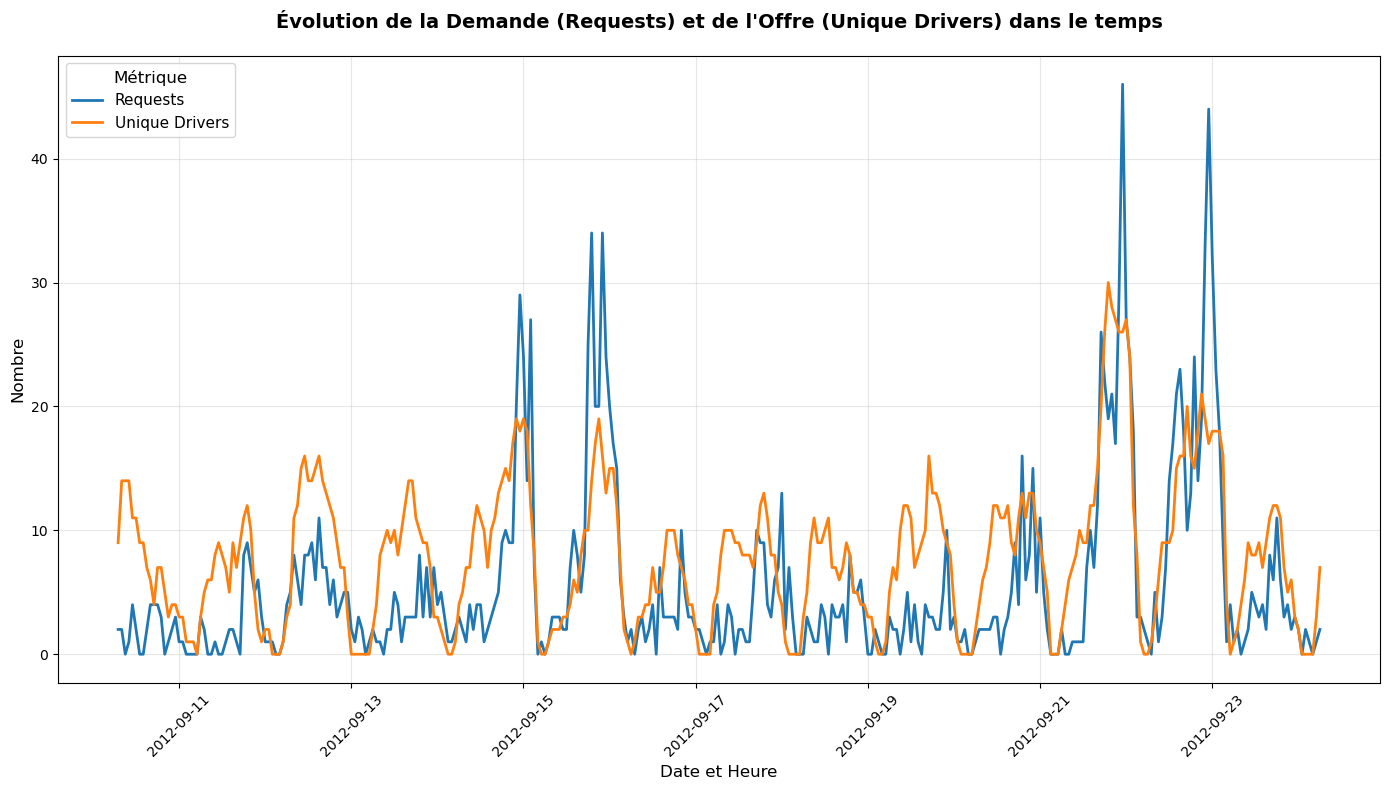

In [65]:
"""
QUESTION 7 : Vrai ou faux - L'offre augmente toujours quand la demande augmente ?
==================================================================================
"""

df.columns = df.columns.str.strip()

# Calculer les différences (variations heure par heure)
df_sorted = df.sort_values('DateTime').reset_index(drop=True)

difference_df = pd.DataFrame({
    'DateTime': df_sorted['DateTime'],
    'Requests': df_sorted['Requests'],
    'Unique Drivers': df_sorted['Unique Drivers'],
    'request_diff': df_sorted['Requests'].diff(),
    'supply_diff': df_sorted['Unique Drivers'].diff()
})

# Supprimer la première ligne (pas de différence)
difference_df = difference_df.dropna()

print("\n📊 VÉRIFICATION :")
print("-" * 80)

# Vérifier si l'offre augmente toujours quand la demande augmente
result = (difference_df[difference_df['request_diff'] > 0]['supply_diff'] > 0).all()

print(f"\nQuand la demande augmente (request_diff > 0),")
print(f"l'offre augmente-t-elle TOUJOURS (supply_diff > 0) ?")
print(f"\n{'✅ VRAI' if result else '❌ FAUX'}")
print(f"\nRésultat : {result}")

# Préparer les données pour le graphique (format long pour seaborn)
df_melted = df[['DateTime', 'Requests', 'Unique Drivers']].melt(
    id_vars=['DateTime'],
    var_name='Metric',
    value_name='Value'
)

# Créer le graphique
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x='DateTime', y='Value', hue='Metric', linewidth=2)

plt.title('Évolution de la Demande (Requests) et de l\'Offre (Unique Drivers) dans le temps', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Date et Heure', fontsize=12)
plt.ylabel('Nombre', fontsize=12)
plt.legend(title='Métrique', fontsize=11, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()


In [ ]:
"""
QUESTION 8 : Au cours de quelle période de 72 heures le ratio de zéros 
             par rapport aux eyeballs est-il le plus élevé ?
============================================================================
"""

df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values('DateTime').reset_index(drop=True)

print("=" * 80)
print("QUESTION 8 : PÉRIODE DE 72H AVEC LE RATIO ZÉROS/EYEBALLS LE PLUS ÉLEVÉ")
print("=" * 80)

# Calculer le ratio pour chaque fenêtre glissante de 72 heures
resultats = []

for i in range(len(df) - 71):  # -71 car on a besoin de 72 heures consécutives
    fenetre = df.iloc[i:i+72]
    
    # Vérifier que c'est bien 72 heures consécutives
    debut = fenetre.iloc[0]['DateTime']
    fin = fenetre.iloc[71]['DateTime']
    diff_heures = (fin - debut).total_seconds() / 3600
    
    if diff_heures == 71:  # 72 points = 71 heures de différence
        total_zeroes = fenetre['Zeroes'].sum()
        total_eyeballs = fenetre['Eyeballs'].sum()
        
        # Calculer le ratio (éviter division par zéro)
        ratio = total_zeroes / total_eyeballs if total_eyeballs > 0 else 0
        
        resultats.append({
            'Debut': debut,
            'Fin': fin,
            'Total_Zeroes': total_zeroes,
            'Total_Eyeballs': total_eyeballs,
            'Ratio': ratio
        })

# Convertir en DataFrame
resultats_df = pd.DataFrame(resultats)

# Trouver le maximum
max_row = resultats_df.loc[resultats_df['Ratio'].idxmax()]

print(f"\nPériode avec le ratio Zéros/Eyeballs le plus élevé :")
print(f"  📅 Début : {max_row['Debut']}")
print(f"  📅 Fin   : {max_row['Fin']}")
print(f"\n  📊 Total Zéros    : {int(max_row['Total_Zeroes']):,}")
print(f"  📊 Total Eyeballs : {int(max_row['Total_Eyeballs']):,}")
print(f"  📈 Ratio          : {max_row['Ratio']:.4f}")
print(f"                      ({max_row['Ratio']*100:.2f}%)")

QUESTION 8 : PÉRIODE DE 72H AVEC LE RATIO ZÉROS/EYEBALLS LE PLUS ÉLEVÉ

🏆 RÉSULTAT

Période avec le ratio Zéros/Eyeballs le plus élevé :
  📅 Début : 2012-09-15 05:00:00
  📅 Fin   : 2012-09-18 04:00:00

  📊 Total Zéros    : 438
  📊 Total Eyeballs : 1,495
  📈 Ratio          : 0.2930
                      (29.30%)


In [68]:
"""
QUESTION 9 : À quelle heure ajouter 5 chauffeurs supplémentaires ?
====================================================================
Analyse basée sur le ratio Eyeballs/Drivers
"""

df['DateTime'] = pd.to_datetime(df['DateTime'])
df.columns = df.columns.str.strip()

print("=" * 80)
print("QUESTION 9 : À QUELLE HEURE AJOUTER 5 CHAUFFEURS ?")
print("=" * 80)

# Agréger par heure de la journée
df_agg_time = df.groupby('Time (Local)').sum(numeric_only=True).reset_index()

# Calculer le ratio eyeballs/drivers
df_agg_time['eyeball_to_driver_ratio'] = df_agg_time['Eyeballs'] / df_agg_time['Unique Drivers']

# Trouver l'heure avec le ratio le plus élevé
best_hour = df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')

print("\nHeure avec le ratio Eyeballs/Drivers le plus élevé :")
print(best_hour.to_string(index=False))

print("\n" + "=" * 80)
print("✅ RÉPONSE :")
print("=" * 80)
best_hour_value = best_hour['Time (Local)'].values[0]
print(f"\nAjouter 5 chauffeurs à {best_hour_value}h00")

QUESTION 9 : À QUELLE HEURE AJOUTER 5 CHAUFFEURS ?

Heure avec le ratio Eyeballs/Drivers le plus élevé :
 Time (Local)  Eyeballs  Zeroes  Completed Trips  Requests  Unique Drivers  Ratio_Trajets_Conducteur  DayOfWeek  IsWeekend  eyeball_to_driver_ratio
           23       488     193              126       184             119                 11.269306         42          4                  4.10084

✅ RÉPONSE :

Ajouter 5 chauffeurs à 23h00


In [69]:
"""
QUESTION 10 : Vrai ou faux - Cette analyse porte sur exactement deux semaines de données ?
===========================================================================================
"""

df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values('DateTime').reset_index(drop=True)

print("=" * 80)
print("QUESTION 10 : EXACTEMENT DEUX SEMAINES DE DONNÉES ?")
print("=" * 80)

# Trouver la première et dernière date/heure
premiere_heure = df['DateTime'].min()
derniere_heure = df['DateTime'].max()

# Calculer la durée
duree = derniere_heure - premiere_heure

# Calculer en heures, jours et semaines
duree_heures = duree.total_seconds() / 3600
duree_jours = duree.total_seconds() / (3600 * 24)
duree_semaines = duree_jours / 7

# Nombre total d'heures dans le dataset
nombre_heures = len(df)

print("\n📊 ANALYSE DE LA PÉRIODE :")
print("=" * 80)
print(f"\nPremière heure : {premiere_heure}")
print(f"Dernière heure : {derniere_heure}")
print(f"\nDurée totale   : {duree}")
print(f"               = {duree_heures:.1f} heures")
print(f"               = {duree_jours:.2f} jours")
print(f"               = {duree_semaines:.4f} semaines")
print(f"\nNombre d'heures dans le dataset : {nombre_heures}")

# Vérification : exactement 2 semaines ?
deux_semaines_heures = 14 * 24  # 336 heures
deux_semaines_jours = 14

print("\n" + "=" * 80)
print("🏆 RÉPONSE :")
print("=" * 80)

# Vérifier si c'est exactement 2 semaines
if duree_jours == deux_semaines_jours and nombre_heures == deux_semaines_heures:
    print("\n✅ VRAI : Exactement 2 semaines de données")
    print(f"\n   14 jours complets × 24 heures = 336 heures ✓")
else:
    print("\n❌ FAUX : Ce n'est PAS exactement 2 semaines")
    print(f"\n   Attendu : 14 jours (336 heures)")
    print(f"   Réel    : {duree_jours:.2f} jours ({nombre_heures} heures)")
    
    # Calculer la différence
    diff_jours = abs(duree_jours - deux_semaines_jours)
    diff_heures = abs(nombre_heures - deux_semaines_heures)
    
    if diff_heures > 0:
        print(f"\n   Différence : {diff_jours:.2f} jours ({int(diff_heures)} heures)")

# Détails supplémentaires
print("\n" + "=" * 80)
print("📅 DÉTAILS :")
print("=" * 80)

# Extraire les dates uniques
df['Date'] = df['DateTime'].dt.date
dates_uniques = sorted(df['Date'].unique())

print(f"\nNombre de jours uniques : {len(dates_uniques)}")
print(f"\nPremier jour : {dates_uniques[0]}")
print(f"Dernier jour : {dates_uniques[-1]}")

print(f"\nListe des jours couverts :")
for i, date in enumerate(dates_uniques, 1):
    heures_ce_jour = len(df[df['Date'] == date])
    print(f"  {i:2d}. {date} ({heures_ce_jour} heures)")



QUESTION 10 : EXACTEMENT DEUX SEMAINES DE DONNÉES ?

📊 ANALYSE DE LA PÉRIODE :

Première heure : 2012-09-10 07:00:00
Dernière heure : 2012-09-24 06:00:00

Durée totale   : 13 days 23:00:00
               = 335.0 heures
               = 13.96 jours
               = 1.9940 semaines

Nombre d'heures dans le dataset : 336

🏆 RÉPONSE :

❌ FAUX : Ce n'est PAS exactement 2 semaines

   Attendu : 14 jours (336 heures)
   Réel    : 13.96 jours (336 heures)

📅 DÉTAILS :

Nombre de jours uniques : 15

Premier jour : 2012-09-10
Dernier jour : 2012-09-24

Liste des jours couverts :
   1. 2012-09-10 (17 heures)
   2. 2012-09-11 (24 heures)
   3. 2012-09-12 (24 heures)
   4. 2012-09-13 (24 heures)
   5. 2012-09-14 (24 heures)
   6. 2012-09-15 (24 heures)
   7. 2012-09-16 (24 heures)
   8. 2012-09-17 (24 heures)
   9. 2012-09-18 (24 heures)
  10. 2012-09-19 (24 heures)
  11. 2012-09-20 (24 heures)
  12. 2012-09-21 (24 heures)
  13. 2012-09-22 (24 heures)
  14. 2012-09-23 (24 heures)
  15. 2012-09-24 (

In [70]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')

In [72]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.columns = df.columns.str.strip()

print("=" * 80)
print("QUESTION 11 : MOMENT OPTIMAL POUR LA 'FIN DE JOURNÉE'")
print("=" * 80)

# Agréger par heure de la journée
hourly_stats = df.groupby('Time (Local)').agg({
    'Eyeballs': ['sum', 'mean'],
    'Requests': ['sum', 'mean'],
    'Unique Drivers': ['sum', 'mean'],
    'Completed Trips': ['sum', 'mean']
}).reset_index()

# Simplifier les noms de colonnes
hourly_stats.columns = ['Hour', 'Eyeballs_Sum', 'Eyeballs_Mean', 
                        'Requests_Sum', 'Requests_Mean',
                        'Drivers_Sum', 'Drivers_Mean',
                        'Trips_Sum', 'Trips_Mean']

print("\n📊 ANALYSE PAR HEURE DE LA JOURNÉE :")
print("=" * 80)

# Normaliser les données pour les comparer (0-1)
hourly_stats['Eyeballs_Norm'] = hourly_stats['Eyeballs_Sum'] / hourly_stats['Eyeballs_Sum'].max()
hourly_stats['Requests_Norm'] = hourly_stats['Requests_Sum'] / hourly_stats['Requests_Sum'].max()
hourly_stats['Drivers_Norm'] = hourly_stats['Drivers_Sum'] / hourly_stats['Drivers_Sum'].max()

# Score combiné : moyenne de la demande et de l'offre normalisées
hourly_stats['Combined_Activity'] = (
    hourly_stats['Eyeballs_Norm'] + 
    hourly_stats['Requests_Norm'] + 
    hourly_stats['Drivers_Norm']
) / 3

# Trouver le minimum d'activité
min_activity_hour = hourly_stats.loc[hourly_stats['Combined_Activity'].idxmin()]

print("\n🏆 RÉPONSE :")
print("=" * 80)
print(f"\nMeilleur moment pour la 'fin de journée' : {int(min_activity_hour['Hour'])}h00")

print(f"\n📈 STATISTIQUES POUR {int(min_activity_hour['Hour'])}H :")
print(f"  • Eyeballs (total)      : {int(min_activity_hour['Eyeballs_Sum'])} (moy: {min_activity_hour['Eyeballs_Mean']:.1f}/jour)")
print(f"  • Requests (total)      : {int(min_activity_hour['Requests_Sum'])} (moy: {min_activity_hour['Requests_Mean']:.1f}/jour)")
print(f"  • Unique Drivers (total): {int(min_activity_hour['Drivers_Sum'])} (moy: {min_activity_hour['Drivers_Mean']:.1f}/jour)")
print(f"  • Score d'activité      : {min_activity_hour['Combined_Activity']:.4f}")

# Top 5 des heures avec le moins d'activité
print("\n" + "=" * 80)
print("TOP 5 DES HEURES AVEC LE MOINS D'ACTIVITÉ :")
print("=" * 80)

top_5_min = hourly_stats.nsmallest(5, 'Combined_Activity')
print(f"\n{'Heure':>5} | {'Eyeballs':>9} | {'Requests':>8} | {'Drivers':>7} | {'Score':>7}")
print("-" * 60)
for idx, row in top_5_min.iterrows():
    print(f"{int(row['Hour']):>5}h | {int(row['Eyeballs_Sum']):>9} | {int(row['Requests_Sum']):>8} | "
          f"{int(row['Drivers_Sum']):>7} | {row['Combined_Activity']:>7.4f}")

# Créer une visualisation
print("\n" + "=" * 80)
print("📈 CRÉATION DE LA VISUALISATION")
print("=" * 80)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Graphique 1 : Évolution de l'offre et de la demande sur 24h
ax1 = axes[0]
ax1_twin = ax1.twinx()

# Demande (gauche)
ax1.plot(hourly_stats['Hour'], hourly_stats['Eyeballs_Sum'], 'b-', linewidth=2.5, 
         marker='o', markersize=6, label='Eyeballs (Demande)', alpha=0.7)
ax1.plot(hourly_stats['Hour'], hourly_stats['Requests_Sum'], 'c--', linewidth=2, 
         marker='s', markersize=5, label='Requests', alpha=0.7)

# Offre (droite)
ax1_twin.plot(hourly_stats['Hour'], hourly_stats['Drivers_Sum'], 'r-', linewidth=2.5, 
              marker='^', markersize=6, label='Unique Drivers (Offre)', alpha=0.7)

# Marquer le minimum
min_hour = int(min_activity_hour['Hour'])
ax1.axvline(x=min_hour, color='green', linestyle=':', linewidth=3, 
            label=f'Minimum activité ({min_hour}h)', alpha=0.8)
ax1.axvspan(min_hour - 0.5, min_hour + 0.5, alpha=0.2, color='green')

ax1.set_xlabel('Heure de la journée', fontsize=12, fontweight='bold')
ax1.set_ylabel('Demande (Eyeballs, Requests)', color='b', fontsize=11, fontweight='bold')
ax1_twin.set_ylabel('Offre (Unique Drivers)', color='r', fontsize=11, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='b')
ax1_twin.tick_params(axis='y', labelcolor='r')
ax1.set_title('Évolution de l\'Offre et de la Demande sur 24 heures', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(range(0, 24))
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=10)
ax1_twin.legend(loc='upper right', fontsize=10)

# Graphique 2 : Score d'activité combiné
ax2 = axes[1]
bars = ax2.bar(hourly_stats['Hour'], hourly_stats['Combined_Activity'], 
               color=['green' if h == min_hour else 'steelblue' for h in hourly_stats['Hour']],
               alpha=0.7, edgecolor='black', linewidth=1)

# Annoter le minimum
ax2.text(min_hour, min_activity_hour['Combined_Activity'] + 0.05, 
         f'{min_hour}h\nMIN', ha='center', fontsize=11, fontweight='bold', color='green')

ax2.set_xlabel('Heure de la journée', fontsize=12, fontweight='bold')
ax2.set_ylabel('Score d\'activité combiné (normalisé)', fontsize=11, fontweight='bold')
ax2.set_title('Score d\'activité combiné (Demande + Offre) - Le minimum indique la "fin de journée" naturelle', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xticks(range(0, 24))
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=min_activity_hour['Combined_Activity'], color='red', 
            linestyle='--', linewidth=2, alpha=0.5, label='Niveau minimum')
ax2.legend(fontsize=10)

plt.tight_layout()
plt.savefig('question11_fin_journee.png', dpi=150, bbox_inches='tight')
print("\n✅ Graphique sauvegardé : question11_fin_journee.png")

# Analyse détaillée du creux nocturne
print("\n" + "=" * 80)
print("🌙 ANALYSE DU CREUX NOCTURNE")
print("=" * 80)

# Heures nocturnes (0h-6h)
heures_nocturnes = hourly_stats[hourly_stats['Hour'] <= 6]
print("\nActivité pendant les heures nocturnes (0h-6h) :")
print(f"\n{'Heure':>5} | {'Eyeballs':>9} | {'Requests':>8} | {'Drivers':>7} | {'Activité':>9}")
print("-" * 60)
for idx, row in heures_nocturnes.iterrows():
    print(f"{int(row['Hour']):>5}h | {int(row['Eyeballs_Sum']):>9} | {int(row['Requests_Sum']):>8} | "
          f"{int(row['Drivers_Sum']):>7} | {row['Combined_Activity']:>9.4f}")

# Comparaison avec minuit
minuit_stats = hourly_stats[hourly_stats['Hour'] == 0].iloc[0]
min_stats = min_activity_hour

print("\n" + "=" * 80)
print("💡 COMPARAISON : MINUIT (0h) vs MINIMUM NATUREL")
print("=" * 80)

print(f"\nÀ MINUIT (0h) :")
print(f"  • Eyeballs : {int(minuit_stats['Eyeballs_Sum'])}")
print(f"  • Requests : {int(minuit_stats['Requests_Sum'])}")
print(f"  • Drivers  : {int(minuit_stats['Drivers_Sum'])}")
print(f"  • Activité : {minuit_stats['Combined_Activity']:.4f}")

print(f"\nÀ {int(min_stats['Hour'])}H (minimum naturel) :")
print(f"  • Eyeballs : {int(min_stats['Eyeballs_Sum'])}")
print(f"  • Requests : {int(min_stats['Requests_Sum'])}")
print(f"  • Drivers  : {int(min_stats['Drivers_Sum'])}")
print(f"  • Activité : {min_stats['Combined_Activity']:.4f}")

reduction = (1 - min_stats['Combined_Activity'] / minuit_stats['Combined_Activity']) * 100
print(f"\nRéduction d'activité : {reduction:.1f}%")

# Conclusion
print("\n" + "=" * 80)
print("✅ CONCLUSION")
print("=" * 80)
print(f"\nLa véritable 'fin de journée' naturelle est à {int(min_stats['Hour'])}h00,")
print(f"car c'est le moment où l'offre ET la demande atteignent leur minimum absolu.")
print(f"\nÀ cette heure :")
print(f"  • Très peu d'utilisateurs cherchent des courses (Eyeballs: {int(min_stats['Eyeballs_Sum'])})")
print(f"  • Très peu de demandes (Requests: {int(min_stats['Requests_Sum'])})")
print(f"  • Très peu de chauffeurs disponibles (Drivers: {int(min_stats['Drivers_Sum'])})")
print(f"\nC'est le moment de creux le plus profond de l'activité Uber.")

QUESTION 11 : MOMENT OPTIMAL POUR LA 'FIN DE JOURNÉE'

📊 ANALYSE PAR HEURE DE LA JOURNÉE :

🏆 RÉPONSE :

Meilleur moment pour la 'fin de journée' : 4h00

📈 STATISTIQUES POUR 4H :
  • Eyeballs (total)      : 29 (moy: 2.1/jour)
  • Requests (total)      : 9 (moy: 0.6/jour)
  • Unique Drivers (total): 9 (moy: 0.6/jour)
  • Score d'activité      : 0.0526

TOP 5 DES HEURES AVEC LE MOINS D'ACTIVITÉ :

Heure |  Eyeballs | Requests | Drivers |   Score
------------------------------------------------------------
    4h |        29 |        9 |       9 |  0.0526
    5h |        42 |       14 |      11 |  0.0742
    6h |        78 |       28 |      37 |  0.1721
    3h |        83 |       35 |      40 |  0.1937
    7h |       111 |       22 |      60 |  0.2262

📈 CRÉATION DE LA VISUALISATION

✅ Graphique sauvegardé : question11_fin_journee.png

🌙 ANALYSE DU CREUX NOCTURNE

Activité pendant les heures nocturnes (0h-6h) :

Heure |  Eyeballs | Requests | Drivers |  Activité
--------------------------